In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 




In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
age,299.0,60.833893,11.894809,40.0,45.0,51.0,60.0,70.0,75.4,82.0,90.080,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,67.6,116.5,250.0,582.0,1203.8,2263.0,5222.460,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,25.0,30.0,38.0,45.0,60.0,60.0,62.060,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,153000.0,212500.0,262000.0,303500.0,374600.0,422500.0,544560.000,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.8,0.9,1.1,1.4,2.1,3.0,6.114,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,132.0,134.0,137.0,140.0,141.2,144.0,145.000,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.0


In [8]:
df["DEATH_EVENT"].value_counts()*100/len(df)

DEATH_EVENT
0    67.892977
1    32.107023
Name: count, dtype: float64

In [9]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

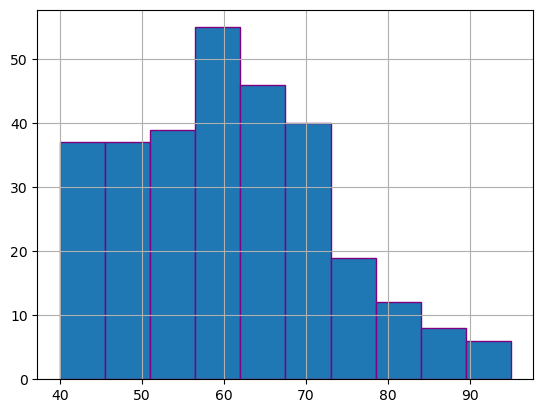

In [10]:
df["age"].hist(edgecolor = "purple");

In [11]:
print("Max age: " + str(df["age"].max()) + " Min age: " + str(df["age"].min()))

Max age: 95.0 Min age: 40.0


<Axes: xlabel='time', ylabel='Density'>

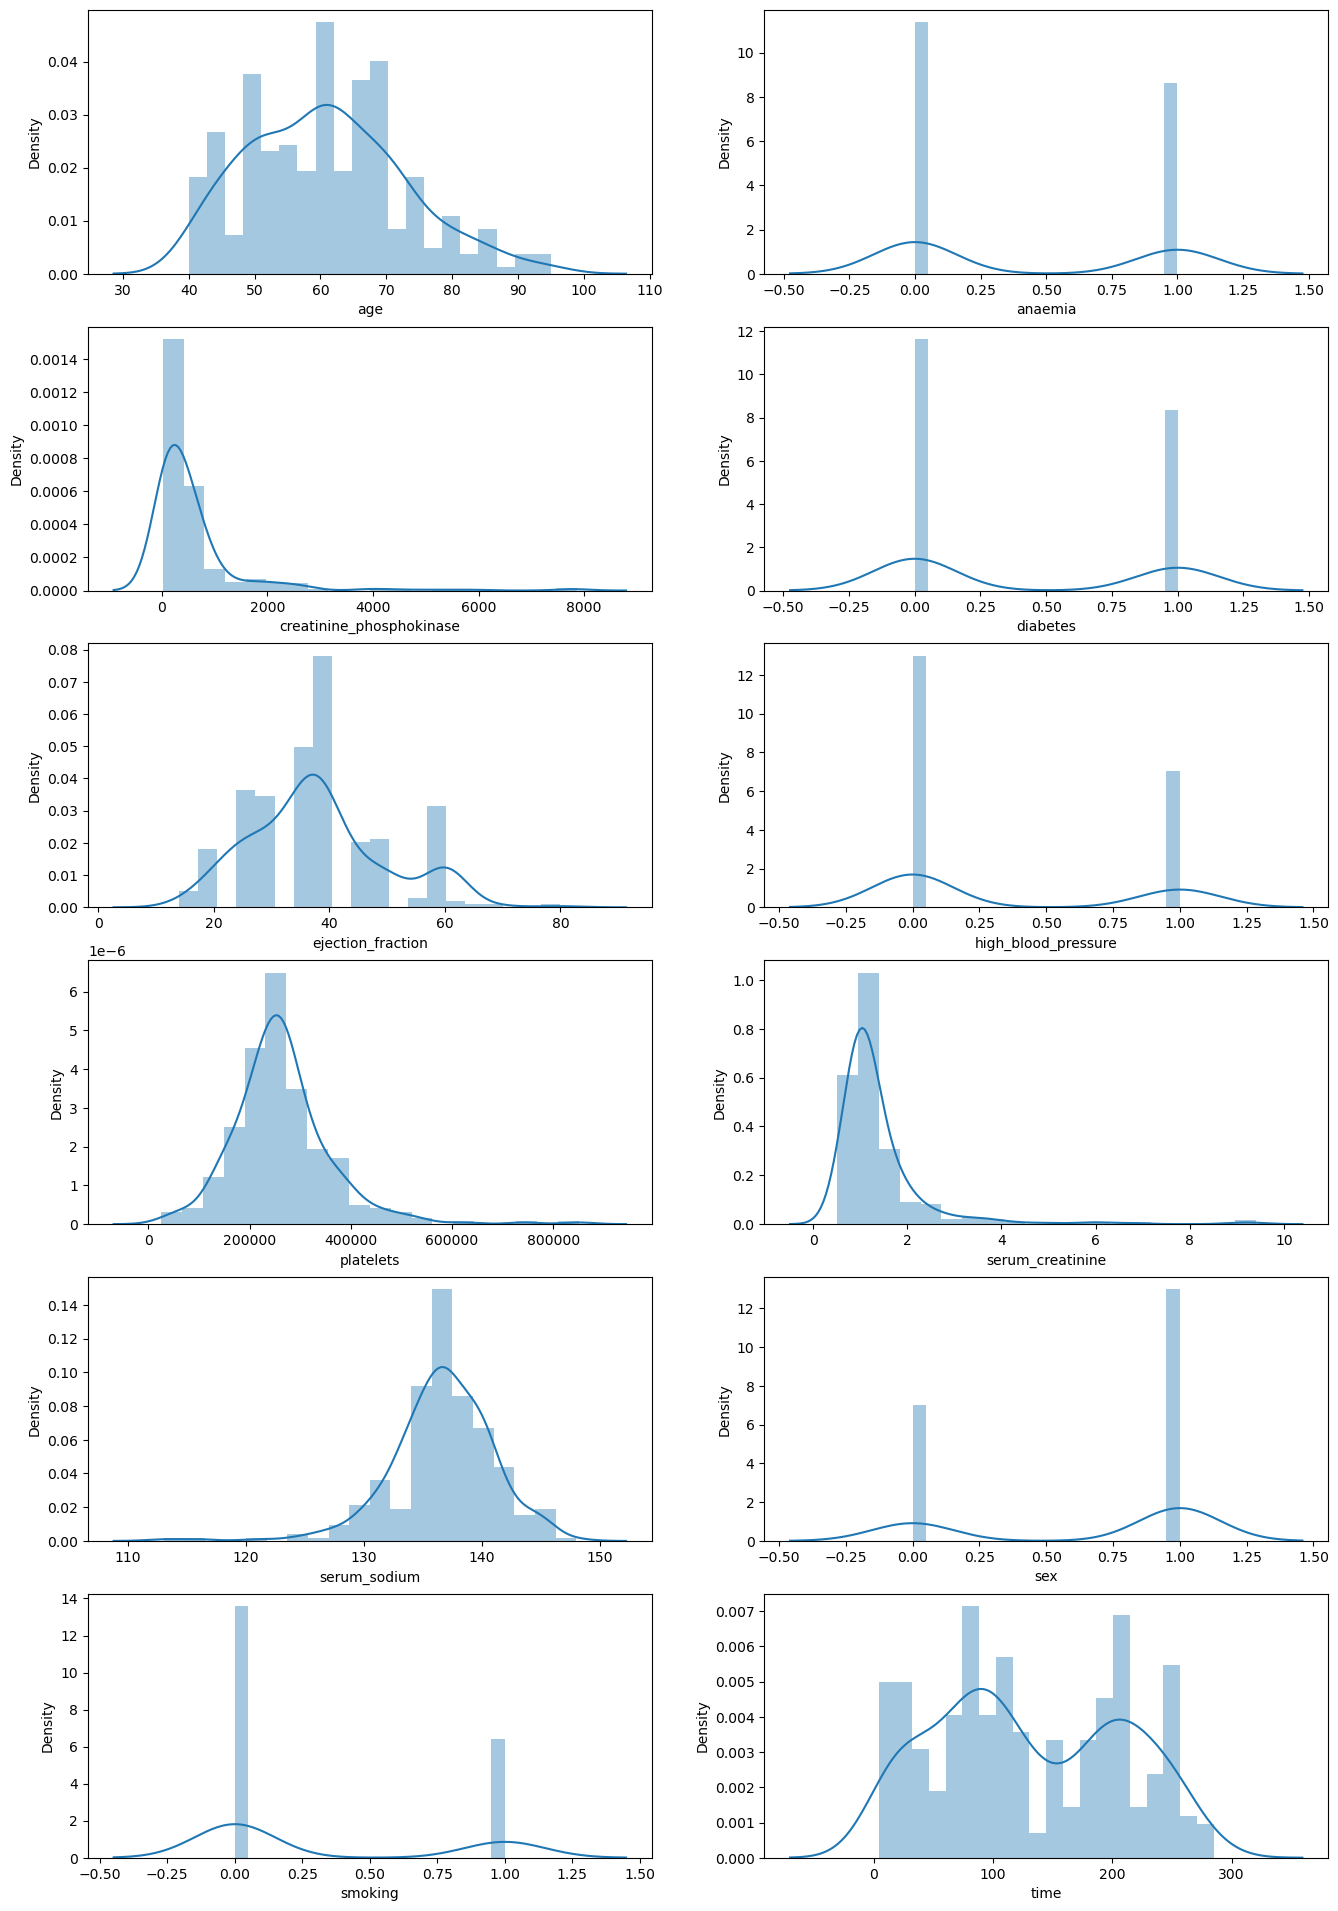

In [26]:
fig, ax = plt.subplots(6, 2, figsize=(16, 24))  # Changed to 6 rows and 2 columns
sns.distplot(df.age, bins = 20, ax=ax[0,0])
sns.distplot(df.anaemia, bins = 20, ax=ax[0,1])
sns.distplot(df.creatinine_phosphokinase, bins = 20, ax=ax[1,0])
sns.distplot(df.diabetes, bins = 20, ax=ax[1,1])
sns.distplot(df.ejection_fraction, bins = 20, ax=ax[2,0])
sns.distplot(df.high_blood_pressure, bins = 20, ax=ax[2,1])
sns.distplot(df.platelets, bins = 20, ax=ax[3,0])
sns.distplot(df.serum_creatinine, bins = 20, ax=ax[3,1])
sns.distplot(df.serum_sodium, bins = 20, ax=ax[4,0])
sns.distplot(df.sex, bins = 20, ax=ax[4,1])
sns.distplot(df.smoking, bins = 20, ax=ax[5,0])
sns.distplot(df.time, bins = 20, ax=ax[5,1])


In [13]:
df.groupby("DEATH_EVENT").agg({"age":"mean"})

,age
DEATH_EVENT,
0,58.761906
1,65.215281


In [15]:
df.groupby("DEATH_EVENT").agg({"anaemia": "mean"})


,anaemia
DEATH_EVENT,
0,0.408867
1,0.479167


In [16]:
df.groupby("DEATH_EVENT").agg({"creatinine_phosphokinase": "mean"})

,creatinine_phosphokinase
DEATH_EVENT,
0,540.054187
1,670.197917


In [17]:
df.groupby("DEATH_EVENT").agg({"diabetes": "mean"})

,diabetes
DEATH_EVENT,
0,0.418719
1,0.416667


In [18]:
df.groupby("DEATH_EVENT").agg({"ejection_fraction": "mean"})

,ejection_fraction
DEATH_EVENT,
0,40.26601
1,33.46875


In [19]:
df.groupby("DEATH_EVENT").agg({"high_blood_pressure": "mean"})

,high_blood_pressure
DEATH_EVENT,
0,0.325123
1,0.406250


In [20]:
df.groupby("DEATH_EVENT").agg({"platelets": "mean"})

,platelets
DEATH_EVENT,
0,266657.489901
1,256381.044792


In [21]:
df.groupby("DEATH_EVENT").agg({"serum_creatinine": "mean"})

,serum_creatinine
DEATH_EVENT,
0,1.184877
1,1.835833


In [22]:
df.groupby("DEATH_EVENT").agg({"serum_sodium": "mean"})

,serum_sodium
DEATH_EVENT,
0,137.216749
1,135.375000


In [23]:
df.groupby("DEATH_EVENT").agg({"sex": "mean"})

,sex
DEATH_EVENT,
0,0.650246
1,0.645833


In [24]:
df.groupby("DEATH_EVENT").agg({"smoking": "mean"})

,smoking
DEATH_EVENT,
0,0.325123
1,0.312500


In [25]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()